In [1]:
# Question 1
import pandas as pd 
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
pingees

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [14]:
# Question 1

# Code directly imported from Chatgpt:

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Drop rows with missing values for 'flipper_length_mm'
penguins_clean = penguins.dropna(subset=['flipper_length_mm'])

# Create an empty figure
fig = go.Figure()

# Define colors for each species
species_colors = {
    "Adelie": "blue",
    "Chinstrap": "green",
    "Gentoo": "orange"
}

# Iterate over each species
for species, color in species_colors.items():
    species_data = penguins_clean[penguins_clean['species'] == species]['flipper_length_mm']

    # Location statistics
    mean = species_data.mean()
    median = species_data.median()

    # Scale statistics
    min_val = species_data.min()
    max_val = species_data.max()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    std_dev = species_data.std()
    lower_2std = mean - 2 * std_dev
    upper_2std = mean + 2 * std_dev

    # Add histogram for the current species
    fig.add_trace(go.Histogram(x=species_data, name=f"{species} Flipper Length", opacity=0.6, marker_color=color, nbinsx=30))

    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line=dict(color=color, width=2, dash="dash"), annotation_text=f'{species} Mean', annotation_position="top left")
    fig.add_vline(x=median, line=dict(color=color, width=2, dash="dot"), annotation_text=f'{species} Median', annotation_position="top right")

    # Add vertical rectangle for range (min to max)
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor=color, opacity=0.2, line_width=0, annotation_text=f'{species} Range', annotation_position="bottom left")

    # Add vertical rectangle for IQR (Q1 to Q3)
    fig.add_vrect(x0=q1, x1=q3, fillcolor=color, opacity=0.4, line_width=0, annotation_text=f'{species} IQR', annotation_position="bottom right")

    # Add vertical rectangle for 2 standard deviations
    fig.add_vrect(x0=lower_2std, x1=upper_2std, fillcolor=color, opacity=0.1, line_width=0, annotation_text=f'{species} ±2σ', annotation_position="top right")

# Update layout and axis labels
fig.update_layout(
    title="Flipper Length Distribution by Species with Location and Scale Annotations",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    barmode="overlay"
)

# Show the plot
fig.show(render='png')


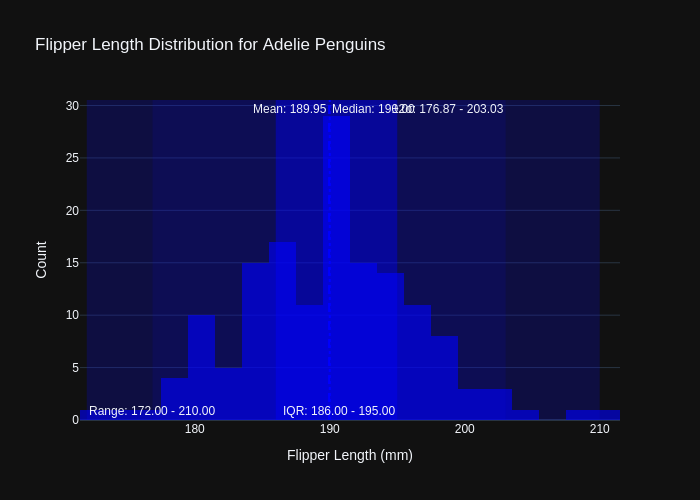

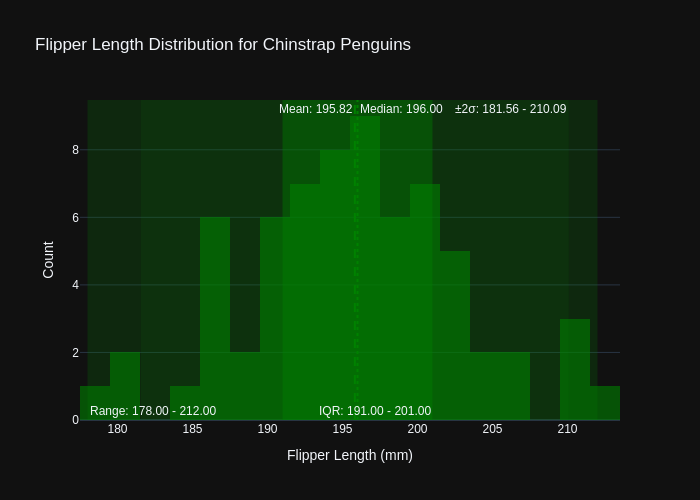

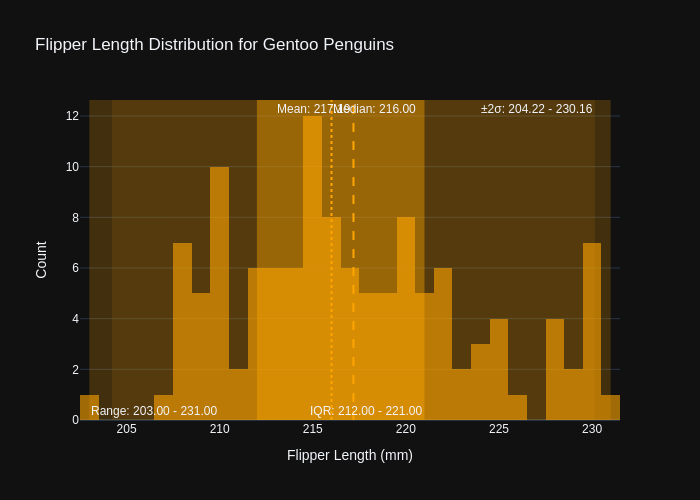

In [15]:
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Drop rows with missing values for 'flipper_length_mm'
penguins_clean = penguins.dropna(subset=['flipper_length_mm'])

# Define colors for each species
species_colors = {
    "Adelie": "blue",
    "Chinstrap": "green",
    "Gentoo": "orange"
}

# Iterate over each species and create separate histograms
for species, color in species_colors.items():
    species_data = penguins_clean[penguins_clean['species'] == species]['flipper_length_mm']

    # Location statistics
    mean = species_data.mean()
    median = species_data.median()

    # Scale statistics
    min_val = species_data.min()
    max_val = species_data.max()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    std_dev = species_data.std()
    lower_2std = mean - 2 * std_dev
    upper_2std = mean + 2 * std_dev

    # Create a new figure for each species
    fig = go.Figure()

    # Add histogram for the current species
    fig.add_trace(go.Histogram(x=species_data, name=f"{species} Flipper Length", opacity=0.6, marker_color=color, nbinsx=30))

    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line=dict(color=color, width=2, dash="dash"), annotation_text=f'Mean: {mean:.2f}', annotation_position="top left")
    fig.add_vline(x=median, line=dict(color=color, width=2, dash="dot"), annotation_text=f'Median: {median:.2f}', annotation_position="top right")

    # Add vertical rectangle for range (min to max)
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor=color, opacity=0.2, line_width=0, annotation_text=f'Range: {min_val:.2f} - {max_val:.2f}', annotation_position="bottom left")

    # Add vertical rectangle for IQR (Q1 to Q3)
    fig.add_vrect(x0=q1, x1=q3, fillcolor=color, opacity=0.4, line_width=0, annotation_text=f'IQR: {q1:.2f} - {q3:.2f}', annotation_position="bottom right")

    # Add vertical rectangle for 2 standard deviations
    fig.add_vrect(x0=lower_2std, x1=upper_2std, fillcolor=color, opacity=0.1, line_width=0, annotation_text=f'±2σ: {lower_2std:.2f} - {upper_2std:.2f}', annotation_position="top right")

    # Update layout and axis labels
    fig.update_layout(
        title=f"Flipper Length Distribution for {species} Penguins",
        xaxis_title="Flipper Length (mm)",
        yaxis_title="Count",
        barmode="overlay"
    )

    # Show the plot for the current species
    fig.show(renderer='png')


Question 1 above - may come back to it, will move on for now

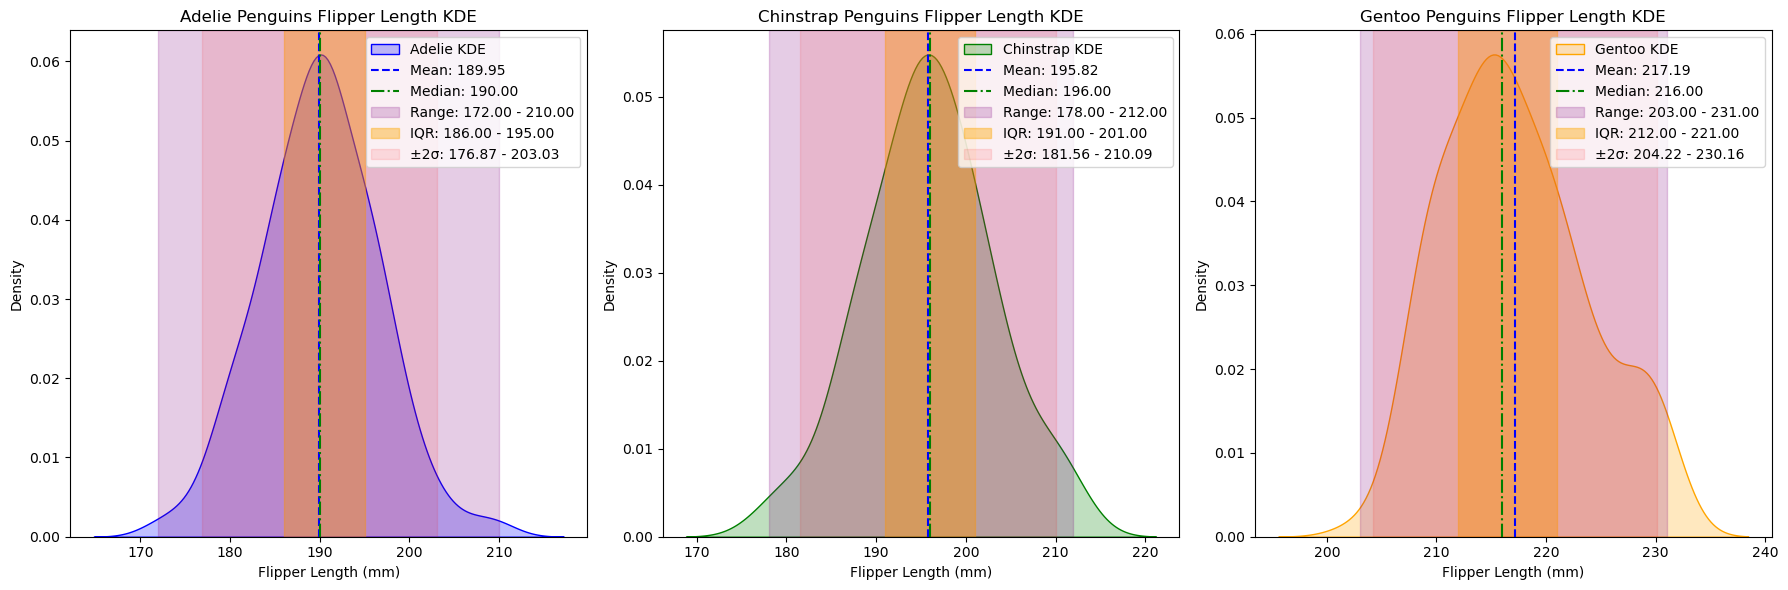

In [4]:
# Question 2 - code that chatgpt gave me directly

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Drop rows with missing values for 'flipper_length_mm'
penguins_clean = penguins.dropna(subset=['flipper_length_mm'])

# Set up the plotting area with 3 plots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define species list and colors for each species
species_list = ['Adelie', 'Chinstrap', 'Gentoo']
species_colors = ['blue', 'green', 'orange']

# Iterate over each species and create KDE plots
for i, species in enumerate(species_list):
    species_data = penguins_clean[penguins_clean['species'] == species]['flipper_length_mm']
    
    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    min_val = species_data.min()
    max_val = species_data.max()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    std_dev = species_data.std()
    lower_2std = mean - 2 * std_dev
    upper_2std = mean + 2 * std_dev

    # Plot KDE for the current species
    sns.kdeplot(species_data, ax=axes[i], color=species_colors[i], fill=True, label=f'{species} KDE')

    # Add vertical lines for mean and median
    axes[i].axvline(mean, color='blue', linestyle='--', label=f'Mean: {mean:.2f}')
    axes[i].axvline(median, color='green', linestyle='-.', label=f'Median: {median:.2f}')

    # Add shaded areas for range (min to max), IQR (Q1 to Q3), and ±2 standard deviations
    axes[i].axvspan(min_val, max_val, color='purple', alpha=0.2, label=f'Range: {min_val:.2f} - {max_val:.2f}')
    axes[i].axvspan(q1, q3, color='orange', alpha=0.4, label=f'IQR: {q1:.2f} - {q3:.2f}')
    axes[i].axvspan(lower_2std, upper_2std, color='red', alpha=0.1, label=f'±2σ: {lower_2std:.2f} - {upper_2std:.2f}')

    # Set plot titles and labels
    axes[i].set_title(f'{species} Penguins Flipper Length KDE')
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].set_ylabel('Density')

    # Add legend to each plot
    axes[i].legend(loc='upper right')

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()


Question 3: describe your preference for one or the other between box plots, histograms and kernel density estimators and your rationale for this preference

I think each of the three has specific applications, and there are good reasons for using any of the three, so it mostly depends on what it is you need the graph to show. If you need to describe the data more easily (quartiles, median, range) then box plots are preferable. If you need to emphasize the shape of the data (modality, skew) then histogram or kernel density estimator is probably better. Between KDE or histograms, I think KDE are better at taking out outliers in the data and at giving a more precise shape to the data, but they will get more unacurate the smaller the sample size. From what I can tell, a Histogram with infinite sample size is the same as a KDE.

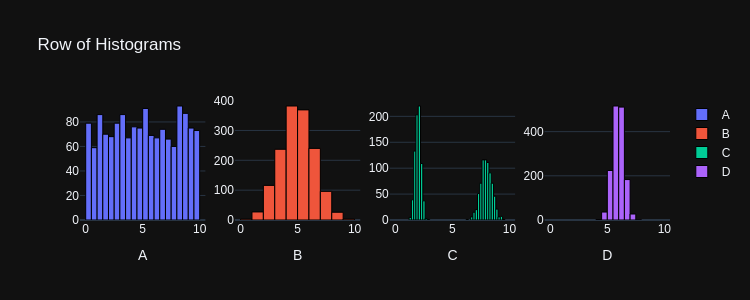

In [16]:
# Question 4

from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


Question 4 (continued):

Questions:
1) Which datasets have similar means and similar variances?
2) Which datasets have similar means but quite different variances?
3) Which datasets have similar variances but quite different means?
4) Which datasets have quite different means and quite different variances?

Answers: (list of pairs of datasets fullfilling requirements)
1) A and C
2) A and B, C and B
3) C and D
4) A and D

Chat gpt summary and link for questions  1-4

summary:Certainly!

1. Penguin Dataset and Plotting with Plotly:
You asked how to mark location (mean, median) and scale (range, interquartile range, and ±2 standard deviations) for the flipper_length_mm of each penguin species on histograms.
We walked through how to load the penguin dataset, split it by species, and create histograms using Plotly, using fig.add_[h/v]line() and fig.add_[h/v]rect() to visually mark these statistics.
You later requested an update to display this analysis using three separate histograms for each penguin species.

2. Kernel Density Estimation (KDE) with Seaborn:
You wanted a similar visualization using KDE plots organized in a row of three plots, one for each species.
We adapted the previous approach to generate KDEs using Seaborn, highlighting mean, median, range, IQR, and ±2 standard deviations.

3. Contrasting Descriptions of Box Plots, Histograms, and KDEs:
You shared your thoughts on box plots, histograms, and KDEs, contrasting their ability to represent shape, sample size, and statistics like quartiles and medians.
I added a few points to enhance your descriptions, mentioning the effect of bin width for histograms, the bandwidth for KDEs, and how outliers are best represented in box plots.

4. Means and Variances of Generated Datasets:
You provided a Python script that generates four datasets with different distributions (uniform, normal, and a mixture of normals).
I calculated the means and variances for each dataset:
Data1 (Uniform): Mean = 4.93, Variance = 8.24
Data2 (Normal): Mean = 4.99, Variance = 2.29
Data3 (Mixture of Normals): Mean = 5.00, Variance = 9.16
Data4 (Normal): Mean = 5.99, Variance = 0.26

5. Code and Data Analysis:
We explored how to use statistical plots in Python for data analysis, covering both visualization and statistical summary for different types of data distributions.
This sums up our entire conversation, which covered both technical aspects of data visualization and statistical analysis!


link: https://chatgpt.com/share/66f483f4-6574-800c-b9e3-402968b8edfe

Question 5:

Median: the center value or average of the two center values

mean: average of all values

if the graph skews to the left, it will "pull" the mean and the median to the left, but the mean more so.

if the graph skews to the right, it will "pull" the mean and the median to the left, but the mean more so.

this is because the mean takes into consideration all values, while the median only takes the central values (or two central values).


summary of chat for this question: 

You shared a piece of Python code that uses scipy, pandas, and numpy to generate samples from a Gamma distribution. The code calculates the mean and median of one sample and generates another sample of negative values from the Gamma distribution. I explained what the code does and pointed out that the plotly.express import was missing for the histogram visualization to work.

You asked about the relationship between the mean and median and how they relate to the skewness of a distribution. I explained how in a right-skewed distribution the mean is greater than the median, in a left-skewed distribution the mean is less than the median, and in symmetric distributions the mean and median are approximately equal.


link: https://chatgpt.com/share/66f4c37b-1c14-800c-a104-2b30f4c2be03

In [6]:
# Question 6

# my dataset on cheeses:

import pandas as pd

cheeses = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-06-04/cheeses.csv')
cheeses

,cheese,url,milk,country,region,family,type,fat_content,calcium_content,texture,rind,color,flavor,aroma,vegetarian,vegan,synonyms,alt_spellings,producers
0,Aarewasser,https://www.cheese.com/aarewasser/,cow,Switzerland,NaN,NaN,semi-soft,NaN,NaN,buttery,washed,yellow,sweet,buttery,False,False,NaN,NaN,Jumi
1,Abbaye de Belloc,https://www.cheese.com/abbaye-de-belloc/,sheep,France,Pays Basque,NaN,"semi-hard, artisan",NaN,NaN,"creamy, dense, firm",natural,yellow,burnt caramel,lanoline,True,False,Abbaye Notre-Dame de Belloc,NaN,NaN
2,Abbaye de Belval,https://www.cheese.com/abbaye-de-belval/,cow,France,NaN,NaN,semi-hard,40-46%,NaN,elastic,washed,ivory,NaN,aromatic,False,False,NaN,NaN,NaN
3,Abbaye de Citeaux,https://www.cheese.com/abbaye-de-citeaux/,cow,France,Burgundy,NaN,"semi-soft, artisan, brined",NaN,NaN,"creamy, dense, smooth",washed,white,"acidic, milky, smooth","barnyardy, earthy",False,False,NaN,NaN,NaN
4,Abbaye de Tamié,https://www.cheese.com/tamie/,cow,France,Savoie,NaN,"soft, artisan",NaN,NaN,"creamy, open, smooth",washed,white,"fruity, nutty","perfumed, pungent",False,False,NaN,"Tamié, Trappiste de Tamie, Abbey of Tamie",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,Sveciaost,https://www.cheese.com/sveciaost/,cow,Sweden,Low-laying regions,NaN,"semi-hard, brined",45%,NaN,"creamy, supple",rindless,pale yellow,acidic,NaN,False,False,NaN,NaN,NaN
1183,Swag,https://www.cheese.com/swag/,goat,Australia,South Australia,NaN,"fresh firm, artisan",NaN,NaN,"creamy, crumbly",ash coated,white,"acidic, creamy",fresh,True,False,NaN,NaN,Woodside Cheese Wrights
1184,Swaledale,https://www.cheese.com/swaledale/,sheep,England,"Swaledale, North Yorkshire",NaN,hard,NaN,NaN,semi firm,NaN,yellow,"smooth, sweet",floral,True,False,Swaledale Sheep Cheese,NaN,NaN
1185,Sweet Style Swiss,https://www.cheese.com/sweet-style-swiss/,NaN,Switzerland,NaN,NaN,"semi-hard, artisan",NaN,NaN,"firm, supple",waxed,NaN,nutty,"nutty, sweet",False,False,NaN,NaN,NaN


Question 6

There is lots of missing data in this dataset, so I will try my best to remove them

- I will check which column have lots of missing values and drop them first to preserve other columns

- I will then get rid of all the columns I just don't want

- then I will just do dropna() to get rid of the rest

In [7]:
# Question 6

#checking for columns with lots of missing values:

cheeses.isnull().sum()

cheese                0
url                   0
milk                 36
country              11
region              332
family              698
type                 13
fat_content         939
calcium_content    1162
texture              58
rind                242
color               142
flavor               98
aroma               258
vegetarian          439
vegan               439
synonyms            893
alt_spellings      1078
producers           400
dtype: int64

In [8]:
# Question 6

# I want to throw out columns where more than half of the values are missing so I have asked chat to give me code to do this:

import pandas as pd

cheeses = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-06-04/cheeses.csv')
cheeses

# Calculate the threshold for dropping columns (e.g., more than 50% missing)
threshold = len(cheeses) * 0.5

# Drop columns where the number of missing values is greater than the threshold
cheeses = cheeses.dropna(axis=1, thresh=threshold)

# I dont want all these columns, so I will drop the ones I am not interested in (also gives more data when using dropna())
# once again using chatgpt code

cheeses = cheeses[['milk', 'country', 'color']]

# now I will just use dropna() on the rest

cheeses = cheeses.dropna()

cheeses


,milk,country,color
0,cow,Switzerland,yellow
1,sheep,France,yellow
2,cow,France,ivory
3,cow,France,white
4,cow,France,white
...,...,...,...
1180,goat,United States,ivory
1182,cow,Sweden,pale yellow
1183,goat,Australia,white
1184,sheep,England,yellow


In [9]:
cheeses.describe()

,milk,country,color
count,1010,1010,1010
unique,20,73,17
top,cow,United States,white
freq,609,272,271


Question 6

Okay cool now lets make some cool histograms and box plots.

- comparing different types of milks and the colour
- comparing different types and their rinds
- for frequency of cheeses produced per country 

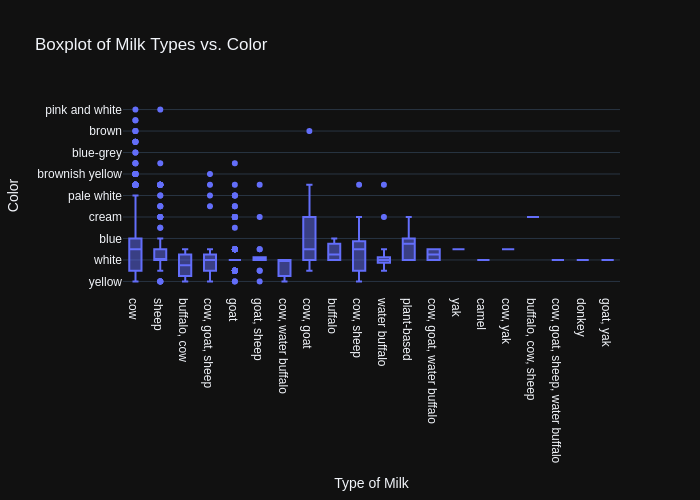

In [17]:
# Question 6

# Code as given by chatgpt

import pandas as pd
import plotly.express as px

# Load the dataset
cheeses = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-06-04/cheeses.csv')

# Drop columns where more than half of the values are missing
threshold = len(cheeses) * 0.5
cheeses = cheeses.dropna(axis=1, thresh=threshold)

# Keep only the relevant columns
cheeses = cheeses[['milk', 'country', 'color']]

# Drop rows with any missing values
cheeses = cheeses.dropna()

# Create an interactive boxplot
fig = px.box(cheeses, x='milk', y='color', title='Boxplot of Milk Types vs. Color',
              labels={'milk': 'Type of Milk', 'color': 'Color'})

# Show the plot
fig.show(renderer='png')


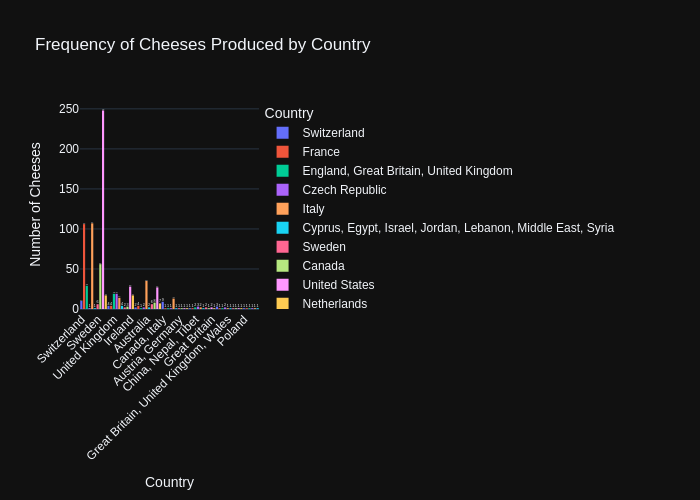

In [19]:
# Question 6

# again code by chatgpt

import pandas as pd
import plotly.express as px

# Load the dataset
cheeses = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-06-04/cheeses.csv')

# Drop columns where more than half of the values are missing
threshold = len(cheeses) * 0.5
cheeses = cheeses.dropna(axis=1, thresh=threshold)

# Keep only the relevant columns
cheeses = cheeses[['milk', 'country', 'type', 'rind', 'color']]

# Drop rows with any missing values
cheeses = cheeses.dropna()

# Create an interactive histogram of the number of cheeses produced in each country
fig = px.histogram(cheeses, x='country', title='Frequency of Cheeses Produced by Country',
                   labels={'country': 'Country'}, 
                   color='country',  # Optional: color by country
                   text_auto=True)   # Show counts on bars

# Update layout for better visualization
fig.update_layout(xaxis_title='Country',
                  yaxis_title='Number of Cheeses',
                  xaxis_tickangle=-45)  # Rotate x-axis labels for better visibility

# Show the plot
fig.show(renderer='png')


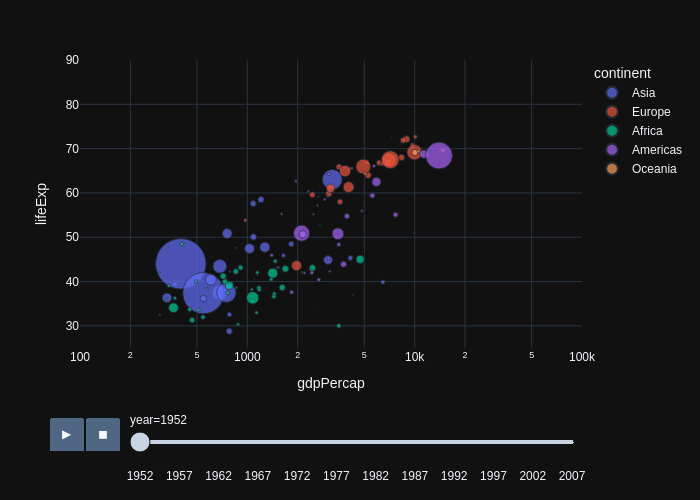

In [24]:
# Question 7

import plotly.io as pio

pio.templates.default = "plotly_dark"

import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig.show(renderer='png')

In [13]:
# Question 8

import plotly.io as pio

pio.templates.default = "plotly_dark"

bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names

import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df, x="percent change", y="rank", animation_frame="year", animation_group="name",
           size="percent", color="continent", hover_name="name",
           size_max=50, range_x=[-0.005,0.005])

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap', 'iso_alpha', 'iso_num'] but received: percent change

Question 8

I couldn't get this to work even after trying to figure it out for a bit so I caved and asked ChatGpt, here's what it gave me:

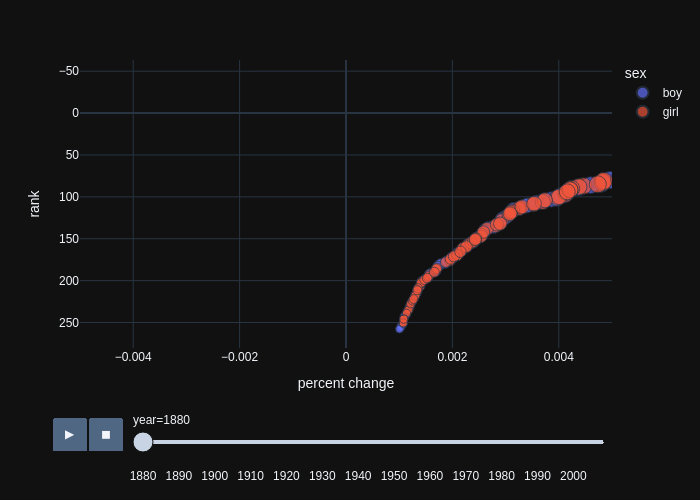

In [27]:
# Question 8

import pandas as pd
import plotly.express as px

# Load the baby names dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct by appending the sex
bn['name'] = bn['name'] + " " + bn['sex']

# Calculate the rank of names within each year based on 'percent'
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

# Sort the dataset by 'name' and 'year'
bn = bn.sort_values(['name', 'year'])

# Calculate the percent change in name prevalence from the last year
bn['percent change'] = bn['percent'].diff()

# Identify when the name changes
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

# Restrict to "common" names where the percent is greater than 0.001
bn = bn[bn['percent'] > 0.001]

# Sort by year to ensure proper animation sequencing
bn = bn.sort_values('year')

# Create the interactive animated scatter plot
fig = px.scatter(bn, x="percent change", y="rank", 
                 animation_frame="year", animation_group="name", 
                 size="percent", color="sex", hover_name="name", 
                 size_max=50, range_x=[-0.005, 0.005])

# Reverse the y-axis to put rank 1 at the top
fig.update_yaxes(autorange='reversed')

# Show the plot
fig.show(renderer='png')  # Use 'renderer="png"' for GitHub and MarkUs submissions


Question 9

Yes